##### Hidden Layers
Multiple layer network also deep neural network are able to capture non linear nonlinearity in the data.


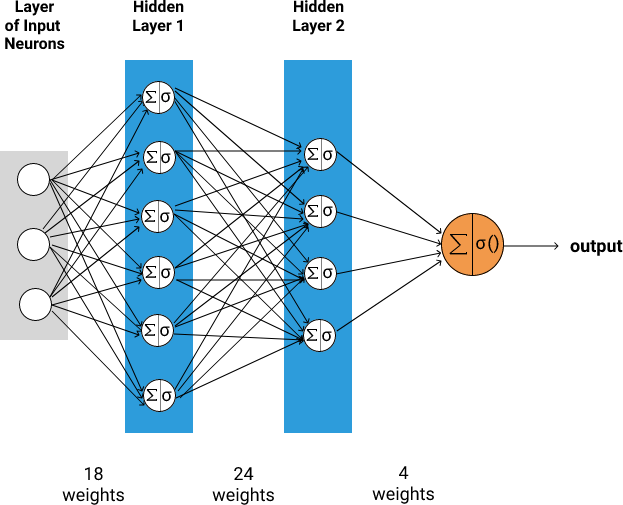
img:DataQuest



In the above picture the first layer of input neurons feed to a second intermediate layer of neurons. if we add more intermediate layers and this often leads to improved model accuracy.

#### Generating Data That Contains Nonlinearity
To genrate data with non linearity going to use the make_moons() function from scikit-learn. By default make_moons genrate 100 rows with 2 features. The noise parameter to specify the standard deviation of the Gaussian noise we want added to the data

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data= make_moons(random_state=3, noise=0.04)
features=pd.DataFrame(data[0])
labels =pd.Series(data[1])

fig=plt.figure(figsize=(8,8))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(features[0],features[1], labels)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

Text(0.5, 0, 'y')

##### Training A Neural Network Using Scikit-learn

Train a neural network with a hidden layer using scikit-learn and compare this model with a logistic regression model.

Scikit-learn contains two classes for working with neural networks:

- MLPClassifier
- MLPRegressor

Train a neural network with a hidden layer using MLPClassifier.we can specify the number of hidden layers using the hidden_layer_sizes parameter. This parameter accepts a tuple where the index value corresponds to the number of neurons in that hidden layer. By default this parmater set to (100,) which corresponds to a hundred neurons in a single hidden layer.

The activation function parameter. This parameter accepts only the following string values:

- 'identity': the identity function
- 'logistic': the sigmoid function
- 'tanh': the hyperbolic tangent (tanh) function
- 'relu': the ReLU function

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
np.random.seed(8)

data= make_moons(100, random_state=3, noise=0.04)
features = pd.DataFrame(data[0])
labels= pd.Series(data[1])
features["bias"] = 1

shuffled_index = np.random.permutation(features.index)
shuffled_data  = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]

# train a neural network model

mlp = MLPClassifier(hidden_layer_sizes=(1,),activation='logistic' )
mlp.fit(train_features, train_labels)
nn_predictions =mlp.predict(test_features)

#train a logistic regression 
lr = LogisticRegression()
lr.fit(train_features,train_labels )
lr_predict = lr.predict(test_features)

nn_accuracy = accuracy_score(test_labels, nn_predictions)
log_accuracy = accuracy_score(test_labels, lr_predict)

print("Logistic Regression Model Accuracy: ", log_accuracy)
print("Single Neuron Single Layer NN Model Accuracy: ", nn_accuracy)

Logistic Regression Model Accuracy:  0.88
Single Neuron Single Layer NN Model Accuracy:  0.48


The logistic regression model performed much better than the neural network model with one hidden layer and one neuron, if we add more intermediate layers and this often leads to improved model accuracy.

In [8]:
np.random.seed(8)
shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]
neurons = [1, 5, 10, 15, 20, 25]
accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic')
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(accuracy)
    
print(accuracies)

C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

[0.48, 0.78, 0.86, 0.82, 0.84, 0.86]


C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### Multiple Hidden Layers
By increasing the number of hidden layers we can observer on the overall accuracy of the network . max_iter parameter, which is set to 200 by default.

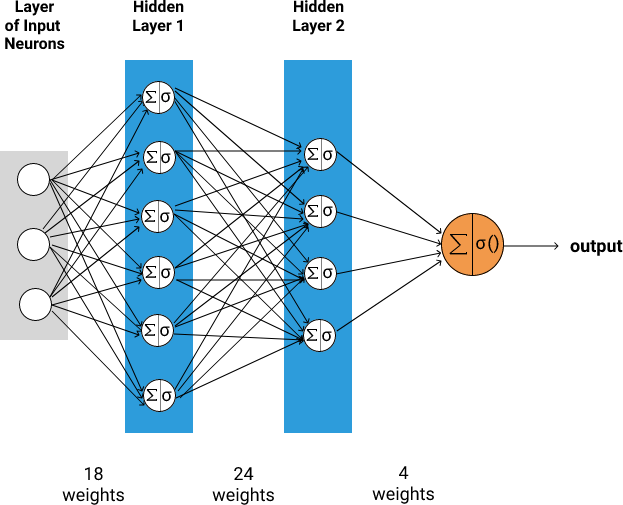

img:DataQuest

In [9]:
neurons =[1,5,10,15,20,25]
nn_accuracies =[]
for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n), activation='relu', max_iter = 1000)
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    nn_accuracies.append(accuracy)
    
print(nn_accuracies)

C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.52, 0.88, 1.0, 1.0, 1.0, 1.0]


It looks like the accuracy increased all the way to 100%! 